# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: `s3://cis9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
%%info

In [2]:
# Installing all libraries I might need
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("scipy==1.7.1")
sc.install_pypi_package("seaborn==0.11.2")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
10,application_1651323976290_0011,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d9/41/d9cfb4410589805cd787f8a82cddd13142d9bf7449d12adf2d05a4a7d633/pyparsing-3.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/50/9a9a94afa26c50fc5d9127272737806990aa698c7a1c220b8e5075e70304/kiwisolver-1.4.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

## Importing

Now, import the installed packages from the previous block below.

In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [4]:
# Importing files from S3
business = spark.read.json('s3://xinyujiang-project02/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
# Previewing business dataframe
business.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|[,,,,,,,,,,, True...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|[,,,,,,,,, True,,...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|[8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

# Overview of Data

Display the number of rows and columns in our dataset.

In [6]:
columns = len(business.columns)
rows = business.count()

print('Number of columns in Business table: ',columns)
print('Number of rows in Business table: ',rows)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Business table:  14
Number of rows in Business table:  150346

Display the DataFrame schema below.

In [7]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [8]:
business.createOrReplaceTempView("business")
spark.sql("""
SELECT 
    business_id,
    name,
    city,
    state,
    categories
FROM business
""").show(5, truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-----+--------------------+
|         business_id|                name|         city|state|          categories|
+--------------------+--------------------+-------------+-----+--------------------+
|Pns2l4eNsfO8kk83d...|Abby Rappoport, L...|Santa Barbara|   CA|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|       The UPS Store|       Affton|   MO|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|              Target|       Tucson|   AZ|Department Stores...|
|MTSW4McQd7CbVtyjq...|  St Honore Pastries| Philadelphia|   PA|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Perkiomen Valley ...|   Green Lane|   PA|Brewpubs, Breweri...|
+--------------------+--------------------+-------------+-----+--------------------+
only showing top 5 rows

--------------------------

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [9]:
# Install the necessary libraries here
# SQL functions
from pyspark.sql.functions import explode, split, col, mean, countDistinct

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
business.createOrReplaceTempView("business")
spark.sql("""
SELECT 
    business_id,
    categories
FROM business
""").show(5, truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|Department Stores...|
|MTSW4McQd7CbVtyjq...|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Brewpubs, Breweri...|
+--------------------+--------------------+
only showing top 5 rows

Display the first 5 rows of your association table below.

In [11]:
business = business.withColumn('categories', explode(split('categories',', ')))

business.createOrReplaceTempView("business")
spark.sql("""
SELECT 
    business_id,
    categories
FROM business
""").show(5, truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|             Doctors|
|Pns2l4eNsfO8kk83d...|Traditional Chine...|
|Pns2l4eNsfO8kk83d...|Naturopathic/Holi...|
|Pns2l4eNsfO8kk83d...|         Acupuncture|
|Pns2l4eNsfO8kk83d...|    Health & Medical|
+--------------------+--------------------+
only showing top 5 rows

# Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [12]:
business.createOrReplaceTempView("business")
spark.sql("""
SELECT 
    DISTINCT categories
FROM business
""").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1311

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [13]:
business.groupBy('categories').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Paddleboarding|   98|
|      Dermatologists|  336|
|         Hobby Shops|  552|
|          Bubble Tea|  477|
|             Embassy|    3|
|             Tanning|  667|
|            Handyman|  356|
|      Aerial Fitness|   19|
|             Falafel|  103|
|        Summer Camps|  232|
|       Outlet Stores|  182|
|     Clothing Rental|   37|
|      Sporting Goods| 1662|
|     Cooking Schools|   76|
|  Lactation Services|   27|
|Ski & Snowboard S...|   40|
|             Museums|  413|
|              Doulas|   31|
|                Food|27781|
|         Halotherapy|   23|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

If you want, you can also use seaborn library

In [14]:
business.groupBy('categories').count().orderBy(col('count').desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|52268|
|                Food|27781|
|            Shopping|24395|
|       Home Services|14356|
|       Beauty & Spas|14292|
|           Nightlife|12281|
|    Health & Medical|11890|
|      Local Services|11198|
|                Bars|11065|
|          Automotive|10773|
|Event Planning & ...| 9895|
|          Sandwiches| 8366|
|American (Traditi...| 8139|
|         Active Life| 7687|
|               Pizza| 7093|
|        Coffee & Tea| 6703|
|           Fast Food| 6472|
|  Breakfast & Brunch| 6239|
|      American (New)| 6097|
|     Hotels & Travel| 5857|
+--------------------+-----+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

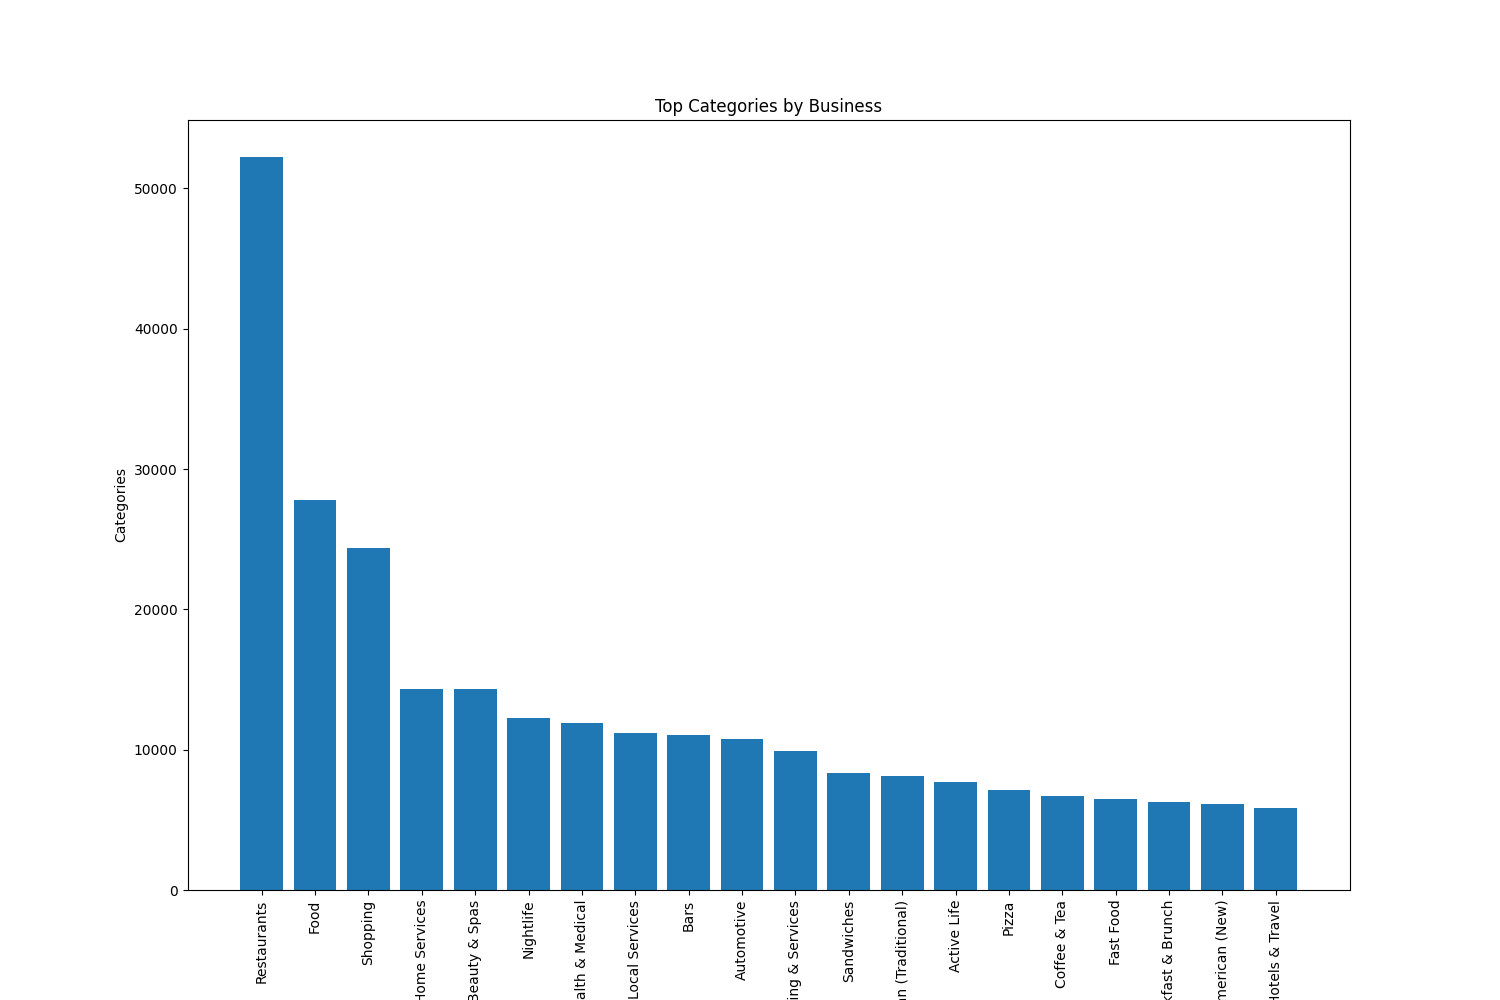

In [15]:
top_business = business.groupBy('categories').count().orderBy(col('count').desc())
pandas_top_business = top_business.toPandas()
x = pandas_top_business.head(20)['categories'].values
y = pandas_top_business.head(20)['count'].values
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Top Categories by Business')
%matplot plt

--------------------------

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available. `s3://cis9760-yelpdataset/yelp-light/*review.json`

In [16]:
review = spark.read.json('s3://xinyujiang-project02/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [18]:
review.createOrReplaceTempView("review")
spark.sql("""
SELECT 
    business_id,
    stars
FROM review
""").show(5, truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|  3.0|
|7ATYjTIgM3jUlt4UM...|  5.0|
|YjUWPpI6HXG530lwP...|  3.0|
|kxX2SOes4o-D3ZQBk...|  5.0|
|e4Vwtrqf-wpJfwesg...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [19]:
review.createOrReplaceTempView("review")
spark.sql("""
SELECT 
    business_id,
    AVG(stars)
FROM review
GROUP BY business_id
""").show(5, truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|HSzSGdcNaU7heQe0N...|3.3333333333333335|
|skW4boArIApRw9DXK...|2.3947368421052633|
|zJErbOQMKX-MwHs_u...|2.9279279279279278|
|I0053JmJ5DEFUWSJ8...|2.3956043956043955|
|wS-SWAa_yaJAw6fJm...| 3.357142857142857|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [20]:
business = business.select('business_id','stars','name','city','state')
review = review.groupby('business_id').avg('stars')

merged = business.join(review, ['business_id'], "inner")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [21]:
merged.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+-------+-----+------------------+
|         business_id|stars|                name|   city|state|        avg(stars)|
+--------------------+-----+--------------------+-------+-----+------------------+
|HSzSGdcNaU7heQe0N...|  3.0|Gillane's Bar & G...|Ardmore|   PA|3.3333333333333335|
|HSzSGdcNaU7heQe0N...|  3.0|Gillane's Bar & G...|Ardmore|   PA|3.3333333333333335|
|HSzSGdcNaU7heQe0N...|  3.0|Gillane's Bar & G...|Ardmore|   PA|3.3333333333333335|
|HSzSGdcNaU7heQe0N...|  3.0|Gillane's Bar & G...|Ardmore|   PA|3.3333333333333335|
|HSzSGdcNaU7heQe0N...|  3.0|Gillane's Bar & G...|Ardmore|   PA|3.3333333333333335|
+--------------------+-----+--------------------+-------+-----+------------------+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [22]:
# Creating "skew" column
merged = merged.toPandas()
merged['skew'] = (merged['avg(stars)'] - merged['stars']) / merged['stars']

# Converting back to spark dataframe
merged = spark.createDataFrame(merged)
merged.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+------------+-----+------------------+--------------------+
|         business_id|stars|                name|        city|state|        avg(stars)|                skew|
+--------------------+-----+--------------------+------------+-----+------------------+--------------------+
|zJErbOQMKX-MwHs_u...|  3.0|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|-0.02402402402402...|
|zJErbOQMKX-MwHs_u...|  3.0|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|-0.02402402402402...|
|zJErbOQMKX-MwHs_u...|  3.0|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|-0.02402402402402...|
|zJErbOQMKX-MwHs_u...|  3.0|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|-0.02402402402402...|
|RZ-FNTXvqHKngyLGD...|  3.0|Gaetano's of West...| West Berlin|   NJ|2.8823529411764706|-0.03921568627450981|
+--------------------+-----+--------------------+------------+-----+------------------+--------------------+
only showing top 5 

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

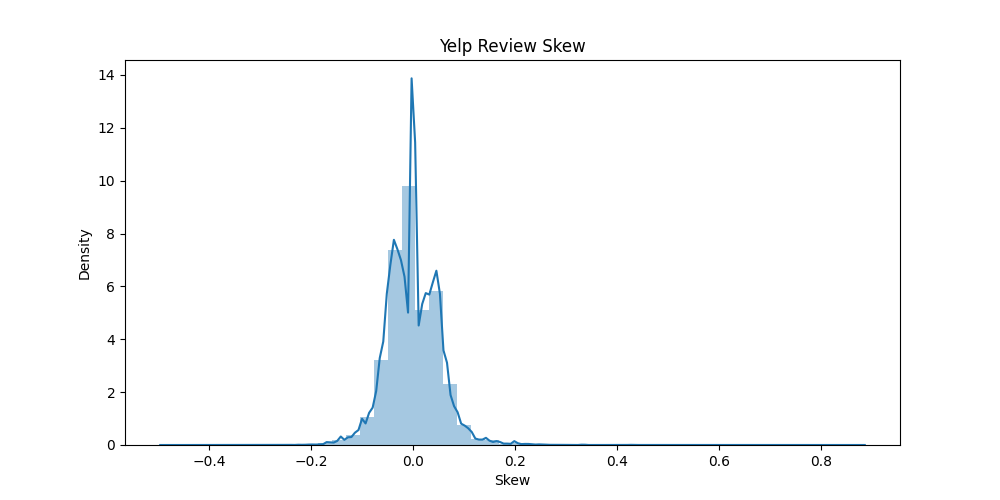

In [23]:
# Using seaborn for the line on distribution plot
merged = merged.toPandas()
plt.figure(figsize=(10,5))
sns.distplot(merged['skew'], kde=True)
plt.title('Yelp Review Skew')
plt.xlabel('Skew')
plt.ylabel('Density')
%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

### IMPLICATIONS

<b><u>Type your answer here:</u></b>

From the graph above, it's hard to tell the skew because the density plot is nearly symmetric. However, it does seem like the graph is <b>very slightly</b> left skewed (negative). This means user reviews of restaurants tend to be more negative (lower user satisfaction).

If I want to explore further, I can use something like <a href="https://www.investopedia.com/terms/s/skewness.asp#measuring-skewness" target="_blank">Pearson's Skewness Formula</a> I found on Investopedia to obtain the exact numbers to establish skewness.

--------------------------

# Should the Elite be Trusted?

How accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating? `s3://cis9760-yelpdataset/yelp-light/*user.json`

Feel free to use any and all methodologies at your disposal. 
You must render one visualization in your analysis and interpret your findings.

In [24]:
# Importing files from S3
user = spark.read.json('s3://xinyujiang-project02/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [26]:
user.createOrReplaceTempView("user")
spark.sql("""
SELECT 
    user_id,
    elite,
    average_stars,
    yelping_since,
    review_count
FROM user
""").show(10, truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-------------------+------------+
|             user_id|               elite|average_stars|      yelping_since|review_count|
+--------------------+--------------------+-------------+-------------------+------------+
|qVc8ODYU5SZjKXVBg...|                2007|         3.91|2007-01-25 16:47:26|         585|
|j14WgRoU_-2ZE1aw1...|2009,2010,2011,20...|         3.74|2009-01-25 04:35:42|        4333|
|2WnXYQFK0hXEoTxPt...|2009,2010,2011,20...|         3.32|2008-07-25 10:41:00|         665|
|SZDeASXq7o05mMNLs...|      2009,2010,2011|         4.27|2005-11-29 04:38:33|         224|
|hA5lMy-EnncsH4JoR...|                    |         3.54|2007-01-05 19:40:59|          79|
|q_QQ5kBBwlCcbL1s4...|2006,2007,2008,20...|         3.85|2005-03-14 20:26:35|        1221|
|cxuxXkcihfCbqt5By...|                    |         2.75|2009-02-24 03:09:06|          12|
|E9kcWJdJUHuTKfQur...|                    |         3.73|2008-12-11 22:11:56|         358|

In [27]:
# From the above we see that there are missing values for elite
# So I will filter only for values that exist and are NOT missing
user = user.filter(user['elite'] != '')
user.createOrReplaceTempView("user")
spark.sql("""
SELECT 
    user_id,
    elite,
    average_stars,
    yelping_since,
    review_count
FROM user
""").show(10, truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-------------------+------------+
|             user_id|               elite|average_stars|      yelping_since|review_count|
+--------------------+--------------------+-------------+-------------------+------------+
|qVc8ODYU5SZjKXVBg...|                2007|         3.91|2007-01-25 16:47:26|         585|
|j14WgRoU_-2ZE1aw1...|2009,2010,2011,20...|         3.74|2009-01-25 04:35:42|        4333|
|2WnXYQFK0hXEoTxPt...|2009,2010,2011,20...|         3.32|2008-07-25 10:41:00|         665|
|SZDeASXq7o05mMNLs...|      2009,2010,2011|         4.27|2005-11-29 04:38:33|         224|
|q_QQ5kBBwlCcbL1s4...|2006,2007,2008,20...|         3.85|2005-03-14 20:26:35|        1221|
|xoZvMJPDW6Q9pDAXI...| 2009,2010,2011,2012|         3.89|2009-05-27 06:12:10|         535|
|SgiBkhXeqIKl1PlFp...|2007,2008,2009,20...|         3.75|2006-08-25 16:47:25|         682|
|QF1Kuhs8iwLWANNZx...|2010,2011,2012,20...|         4.11|2009-04-27 20:25:54|         607|

In [28]:
# Reimporting and selecting columns
business = spark.read.json('s3://xinyujiang-project02/yelp_academic_dataset_business.json')
business = business.select('business_id','name','city','state')

review = spark.read.json('s3://xinyujiang-project02/yelp_academic_dataset_review.json')
review_userID = review.select('user_id','business_id','stars')
review = review.groupby('business_id').avg('stars')

merged = business.join(review, ['business_id'], "inner")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
# Merging
elite_user_reviews = user.join(review_userID, ['user_id'], 'inner')
elite_user_revuews = elite_user_reviews.drop(elite_user_reviews['stars'])
elite_user_reviews = elite_user_reviews.join(review, ['business_id'], 'inner')
elite_user_reviews = elite_user_reviews.select('user_id','elite','stars','average_stars','business_id','avg(stars)')

# elite_user_reviews.createOrReplaceTempView("elite_user_reviews")
# spark.sql("""
# SELECT 
#     user_id,
#     elite,
#     average_stars,
#     business_id,
#     avg(stars)
# FROM elite_user_reviews
# """).show(5, truncate=True)

elite_user_reviews.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+-------------+--------------------+-----------------+
|             user_id|               elite|stars|average_stars|         business_id|       avg(stars)|
+--------------------+--------------------+-----+-------------+--------------------+-----------------+
|fen9BWC39ul9SJZfQ...|2017,2018,2019,20...|  4.0|         3.87|--gJkxbsiSIwsQKbi...|4.833333333333333|
|7jOaJw3txVFlkHB7Y...|           2015,2016|  5.0|         4.49|-02xFuruu85XmDn2x...| 4.68595041322314|
|_VZlDBtCT_Qb3_OOT...|           2018,2019|  5.0|         4.07|-02xFuruu85XmDn2x...| 4.68595041322314|
|EO7u_L1_ZgRdawMrb...|2017,2018,2019,20...|  5.0|         3.93|-02xFuruu85XmDn2x...| 4.68595041322314|
|wqeGcKWbtQLyavwtq...|                2021|  5.0|         3.81|-02xFuruu85XmDn2x...| 4.68595041322314|
+--------------------+--------------------+-----+-------------+--------------------+-----------------+
only showing top 5 rows

In [30]:
# Skew column, same as previous section
elite_user_reviews = elite_user_reviews.toPandas()
elite_user_reviews['skew'] = (elite_user_reviews['stars'] - elite_user_reviews['avg(stars)']) / elite_user_reviews['avg(stars)']
elite_user_reviews = spark.createDataFrame(elite_user_reviews)
elite_user_reviews.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+-------------+--------------------+-----------------+--------------------+
|             user_id|               elite|stars|average_stars|         business_id|       avg(stars)|                skew|
+--------------------+--------------------+-----+-------------+--------------------+-----------------+--------------------+
|fen9BWC39ul9SJZfQ...|2017,2018,2019,20...|  4.0|         3.87|--gJkxbsiSIwsQKbi...|4.833333333333333|-0.17241379310344823|
|7jOaJw3txVFlkHB7Y...|           2015,2016|  5.0|         4.49|-02xFuruu85XmDn2x...| 4.68595041322314| 0.06701940035273375|
|_VZlDBtCT_Qb3_OOT...|           2018,2019|  5.0|         4.07|-02xFuruu85XmDn2x...| 4.68595041322314| 0.06701940035273375|
|EO7u_L1_ZgRdawMrb...|2017,2018,2019,20...|  5.0|         3.93|-02xFuruu85XmDn2x...| 4.68595041322314| 0.06701940035273375|
|2gyrlO8oOuGf5JMOe...|2017,2018,2019,20...|  5.0|         4.06|-02xFuruu85XmDn2x...| 4.68595041322314| 0.06701940035273375|
+-------

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

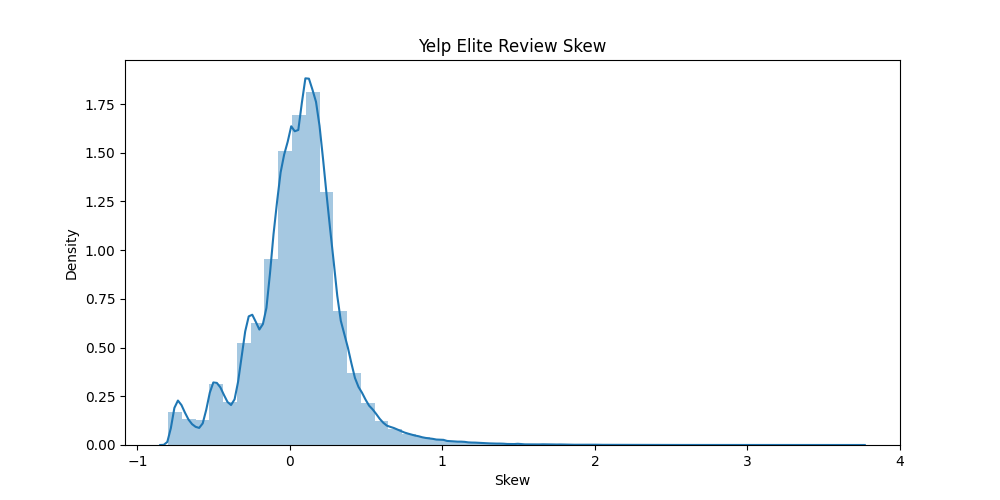

In [31]:
# Seaborn distribution of elite skews
elite_user_reviews = elite_user_reviews.toPandas()
plt.figure(figsize=(10,5))
sns.distplot(elite_user_reviews['skew'], kde=True)
plt.title('Yelp Elite Review Skew')
plt.xlabel('Skew')
plt.ylabel('Density')
%matplot plt

### IMPLICATIONS

The graph above is skewed left - meaning elite users left more negative reviews than normal users. This could be due to having the "Elite" status, these users could be more critical of the restaurant. 

It is worth pointing out that the skewness is not too strong - meaning leaving negative reviews may not be intentional (just for the sake of leaving negative reviews). 

-----------------------------

# Extra Credit (3 points)

Try and analyze some interesting dimension to this data. 
**Requirements:**

You must use the **Users** dataset and join on either the "**business** or **reviews** dataset.

You must render **one visual**